In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
file_path = ""
df = pd.read_csv(file_path)
df

,Sl,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood?
0,0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.70,90.36,4,1949.01,NaN
1,1,Barisal,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.70,90.36,4,1949.02,NaN
2,2,Barisal,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.70,90.36,4,1949.03,NaN
3,3,Barisal,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.70,90.36,4,1949.04,NaN
4,4,Barisal,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.70,90.36,4,1949.05,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20539,20539,Teknaf,2013,8,32.5,25.4,851.0,88.0,2.500000,6.2,3.800000,41998,734765.4,308914.1,20.87,92.26,4,2013.08,1.0
20540,20540,Teknaf,2013,9,32.6,25.7,329.0,88.0,3.000000,6.1,4.200000,41998,734765.4,308914.1,20.87,92.26,4,2013.09,NaN
20541,20541,Teknaf,2013,10,33.1,24.8,271.0,85.0,2.500000,4.4,5.600000,41998,734765.4,308914.1,20.87,92.26,4,2013.10,NaN
20542,20542,Teknaf,2013,11,32.5,20.0,0.0,79.0,2.100000,1.7,8.400000,41998,734765.4,308914.1,20.87,92.26,4,2013.11,NaN


In [33]:
import pandas as pd
import numpy as np

# Load the dataset (adjust the file path as needed)
df = pd.read_csv("FloodPrediction_uncleaned_original.csv")

# Step 1: Create a proper datetime column from Year and Month
# Combine Year and Month into a single date (e.g., '1949-01-01')
df['date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-01', errors='coerce')

# Step 2: Sort by Station_Names and date for meaningful imputation
df = df.sort_values(['Station_Names', 'date']).reset_index(drop=True)

# Step 3: Handle the Flood? column separately
# Fill NaN in Flood? with 0 (no flood) to avoid propagation of 1's
df['Flood?'] = df['Flood?'].fillna(0).astype(int)  # Convert to integer for clarity

# Step 4: Impute missing values in other numerical columns
# Identify numerical columns to fill (exclude non-numeric and Flood?)
numeric_cols = df.select_dtypes(include=[np.number]).columns.drop(['Year', 'Month', 'Station_Number', 'X_COR', 'Y_COR', 'LATITUDE', 'LONGITUDE', 'ALT', 'Flood?'])
df[numeric_cols] = df[numeric_cols].ffill().bfill()  # Forward fill then backward fill

# Step 5: Drop rows with invalid dates (if any)
df = df.dropna(subset=['date'])

# Step 6: Verify and clean data types
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)

# Step 7: Optional - Add a Year-Month period column for easier grouping
df['Period'] = df['Year'].astype(str) + '.' + df['Month'].astype(str).str.zfill(2)

# Step 8: Save the cleaned dataset
df.to_csv("FloodPrediction_cleaned.csv", index=False)

# Optional: Display basic info to verify
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20544 entries, 0 to 20543
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Sl                 20544 non-null  int64         
 1   Station_Names      20544 non-null  object        
 2   Year               20544 non-null  int64         
 3   Month              20544 non-null  int64         
 4   Max_Temp           20544 non-null  float64       
 5   Min_Temp           20544 non-null  float64       
 6   Rainfall           20544 non-null  float64       
 7   Relative_Humidity  20544 non-null  float64       
 8   Wind_Speed         20544 non-null  float64       
 9   Cloud_Coverage     20544 non-null  float64       
 10  Bright_Sunshine    20544 non-null  float64       
 11  Station_Number     20544 non-null  int64         
 12  X_COR              20544 non-null  float64       
 13  Y_COR              20544 non-null  float64       
 14  LATITU

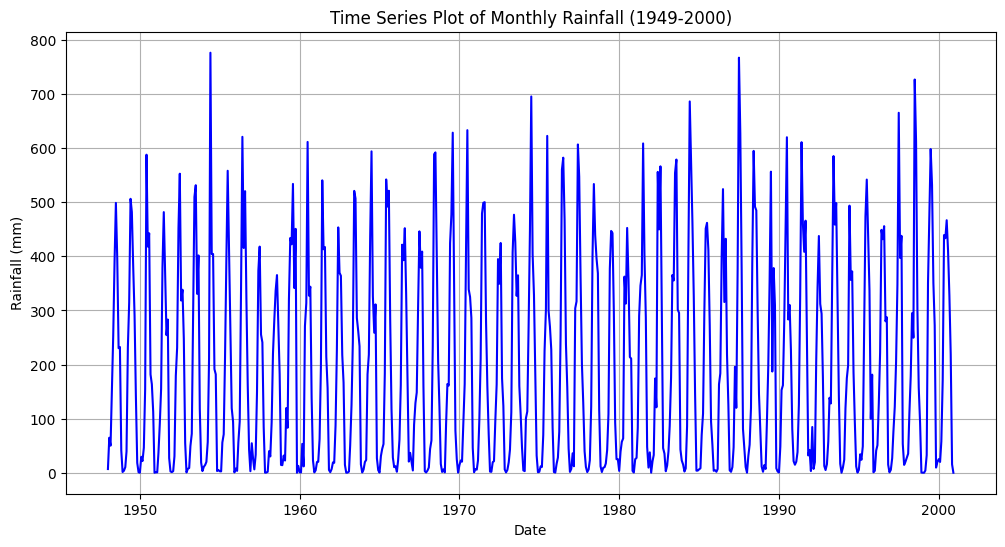

C:\Users\VAJSAJ\AppData\Local\Temp\ipykernel_11964\778744236.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(rainfall_by_month, labels=[str(m) for m in range(1, 13)])


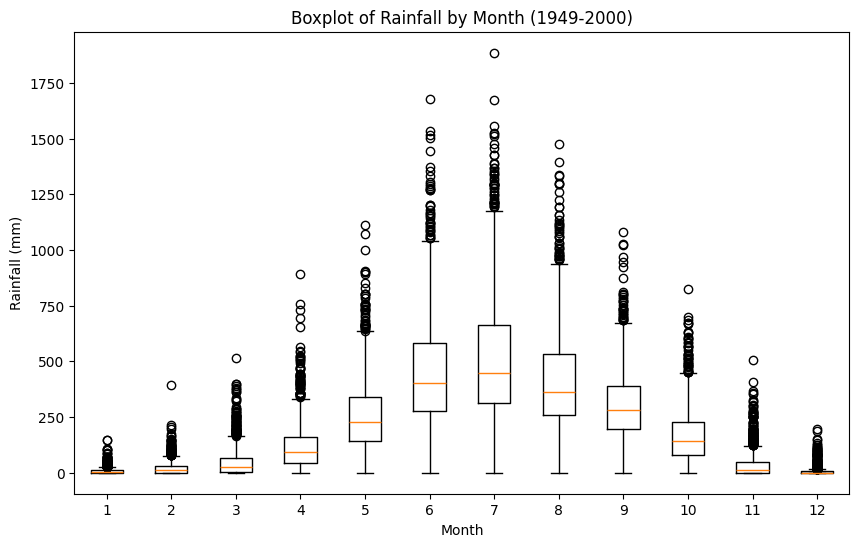

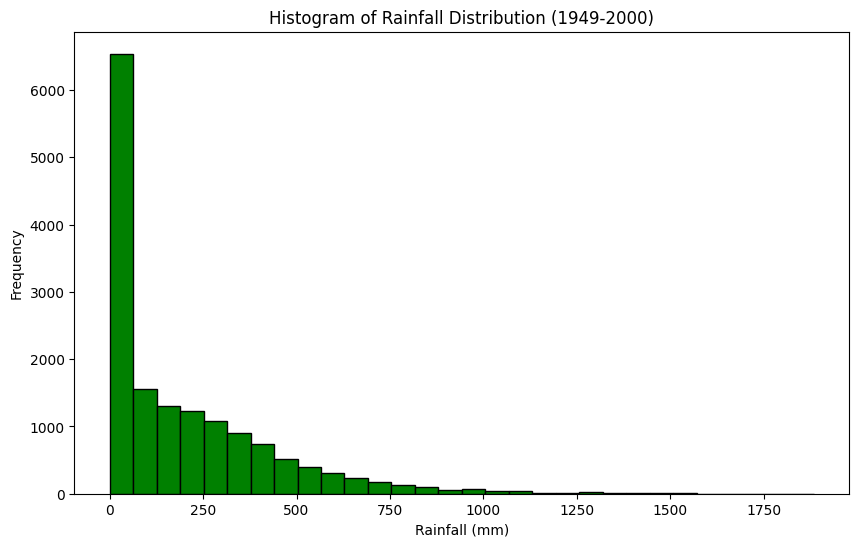

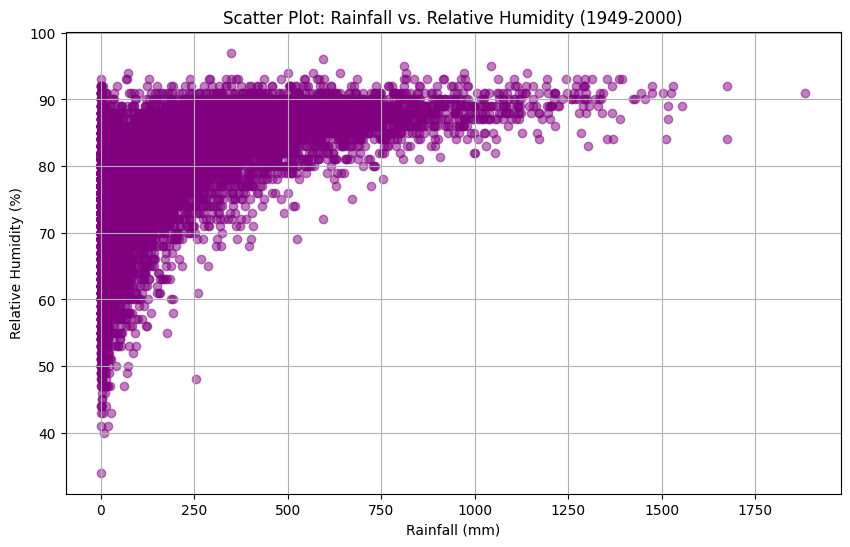

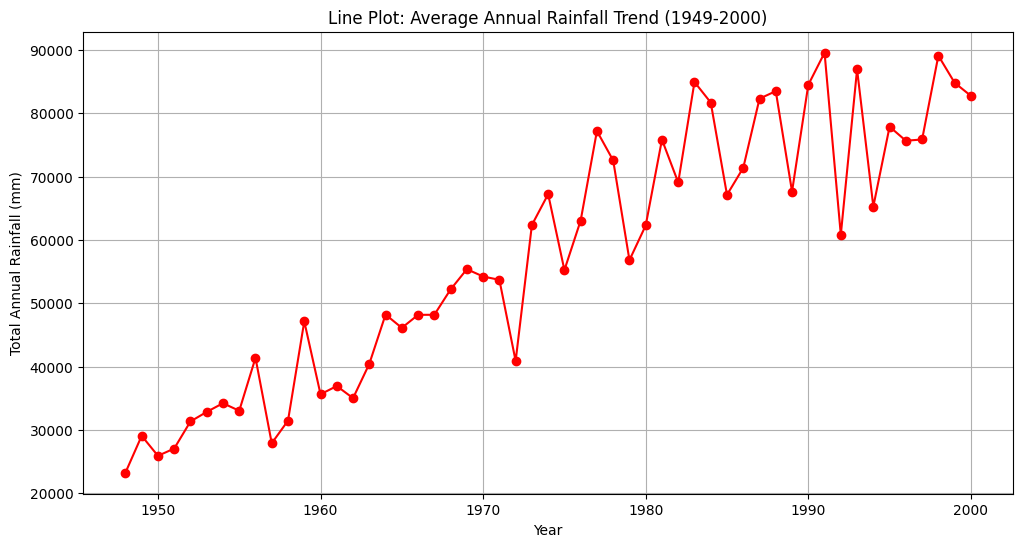

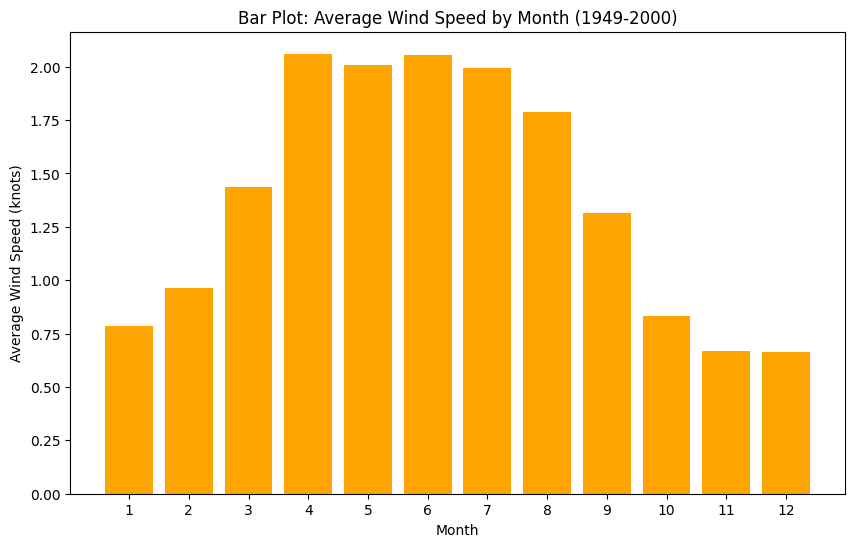

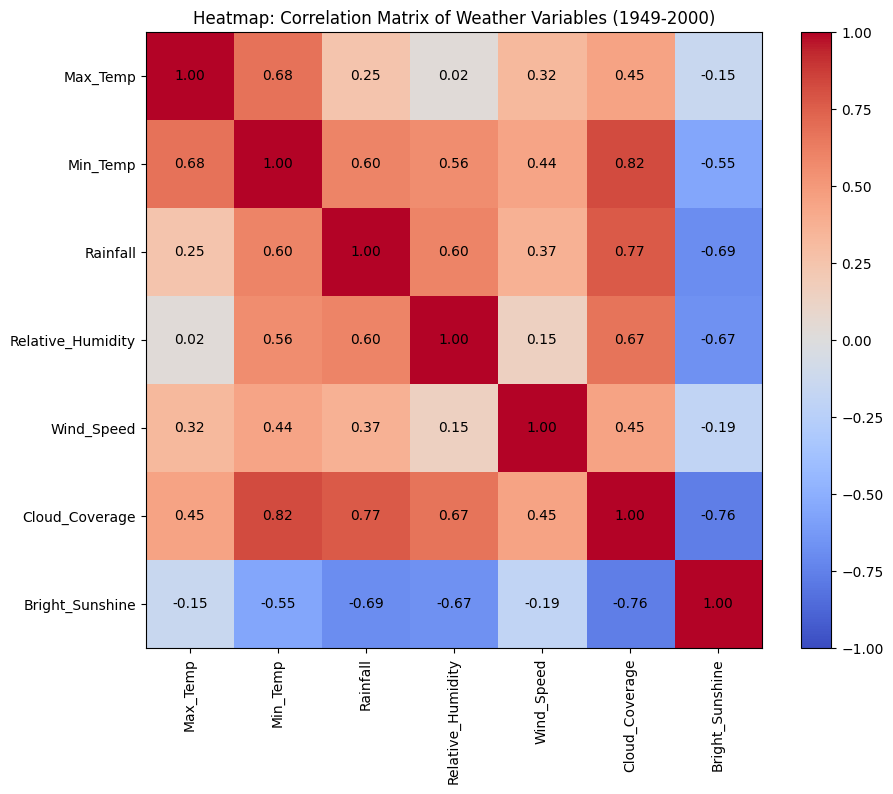

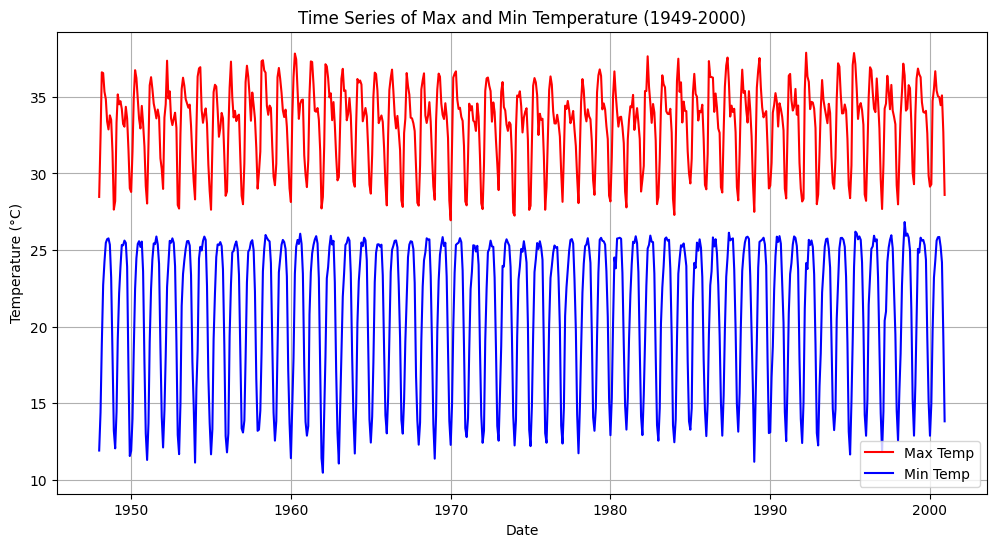

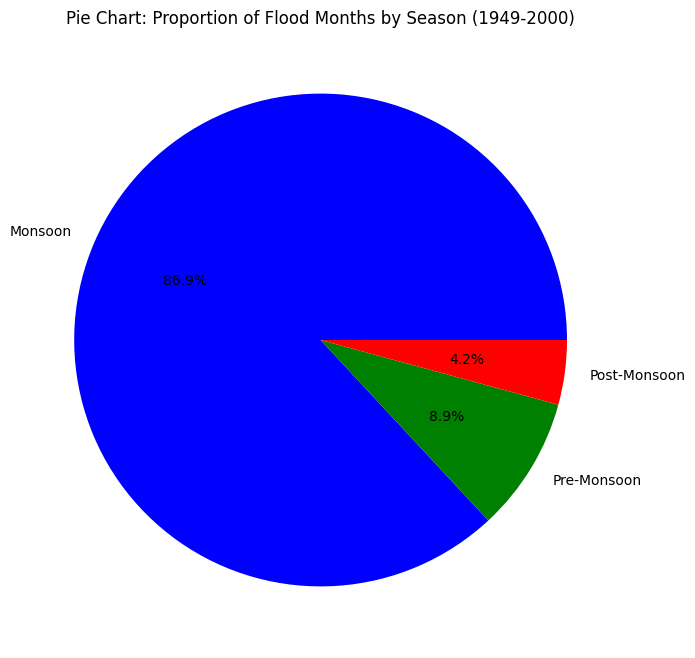

In [38]:
# Load the cleaned dataset
df = pd.read_csv("FloodPrediction_cleaned.csv")

# Filter to derivation dataset (pre-2001)
pre_2001 = df[df['Year'] <= 2000].copy()

# Ensure 'date' is datetime
pre_2001['date'] = pd.to_datetime(pre_2001['date'])

# Select relevant numeric columns for analysis
numeric_cols = ['Max_Temp', 'Min_Temp', 'Rainfall', 'Relative_Humidity', 'Wind_Speed', 
                'Cloud_Coverage', 'Bright_Sunshine']

# Visualization 1: Time Series Plot of Monthly Rainfall (1949-2000)
# Aggregate by date to handle multiple stations
aggregated_rain = pre_2001.groupby('date')['Rainfall'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(aggregated_rain['date'], aggregated_rain['Rainfall'], color='blue')
plt.title('Time Series Plot of Monthly Rainfall (1949-2000)')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.show()

# Visualization 2: Boxplot of Rainfall by Month
# Prepare data: list of rainfall values for each month
rainfall_by_month = [pre_2001[pre_2001['Month'] == month]['Rainfall'].values for month in range(1, 13)]
plt.figure(figsize=(10, 6))
plt.boxplot(rainfall_by_month, labels=[str(m) for m in range(1, 13)])
plt.title('Boxplot of Rainfall by Month (1949-2000)')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.show()

# Visualization 3: Histogram of Rainfall Distribution
plt.figure(figsize=(10, 6))
plt.hist(pre_2001['Rainfall'], bins=30, color='green', edgecolor='black')
plt.title('Histogram of Rainfall Distribution (1949-2000)')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.show()

# Visualization 4: Scatter Plot: Rainfall vs. Relative Humidity
plt.figure(figsize=(10, 6))
plt.scatter(pre_2001['Rainfall'], pre_2001['Relative_Humidity'], alpha=0.5, color='purple')
plt.title('Scatter Plot: Rainfall vs. Relative Humidity (1949-2000)')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Relative Humidity (%)')
plt.grid(True)
plt.show()

# Visualization 5: Line Plot: Average Annual Rainfall Trend (1949-2000)
annual_rainfall = pre_2001.groupby('Year')['Rainfall'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(annual_rainfall['Year'], annual_rainfall['Rainfall'], marker='o', color='red')
plt.title('Line Plot: Average Annual Rainfall Trend (1949-2000)')
plt.xlabel('Year')
plt.ylabel('Total Annual Rainfall (mm)')
plt.grid(True)
plt.show()

# Visualization 6: Bar Plot: Average Wind Speed by Month
monthly_wind = pre_2001.groupby('Month')['Wind_Speed'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(monthly_wind['Month'], monthly_wind['Wind_Speed'], color='orange')
plt.title('Bar Plot: Average Wind Speed by Month (1949-2000)')
plt.xlabel('Month')
plt.ylabel('Average Wind Speed (knots)')
plt.xticks(range(1, 13))
plt.show()

# Visualization 7: Heatmap: Correlation Matrix of Variables
corr_matrix = pre_2001[numeric_cols].corr()
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1, interpolation='none')
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)
# Add annotations
for i in range(len(numeric_cols)):
    for j in range(len(numeric_cols)):
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')
plt.title('Heatmap: Correlation Matrix of Weather Variables (1949-2000)')
plt.show()

# Visualization 8: Time Series of Temperature (Max and Min)
# Aggregate by date to handle multiple stations
aggregated_temp = pre_2001.groupby('date')[['Max_Temp', 'Min_Temp']].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(aggregated_temp['date'], aggregated_temp['Max_Temp'], label='Max Temp', color='red')
plt.plot(aggregated_temp['date'], aggregated_temp['Min_Temp'], label='Min Temp', color='blue')
plt.title('Time Series of Max and Min Temperature (1949-2000)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Visualization 9: Pie Chart: Proportion of Flood Months by Season
# Define seasons: 1-2: Winter, 3-5: Pre-Monsoon, 6-9: Monsoon, 10-12: Post-Monsoon
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Pre-Monsoon'
    elif month in [6, 7, 8, 9]:
        return 'Monsoon'
    else:
        return 'Post-Monsoon'

pre_2001['Season'] = pre_2001['Month'].apply(get_season)
flood_by_season = pre_2001[pre_2001['Flood?'] == 1]['Season'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(flood_by_season, labels=flood_by_season.index, autopct='%1.1f%%', colors=['blue', 'green', 'red', 'orange'])
plt.title('Pie Chart: Proportion of Flood Months by Season (1949-2000)')
plt.show()

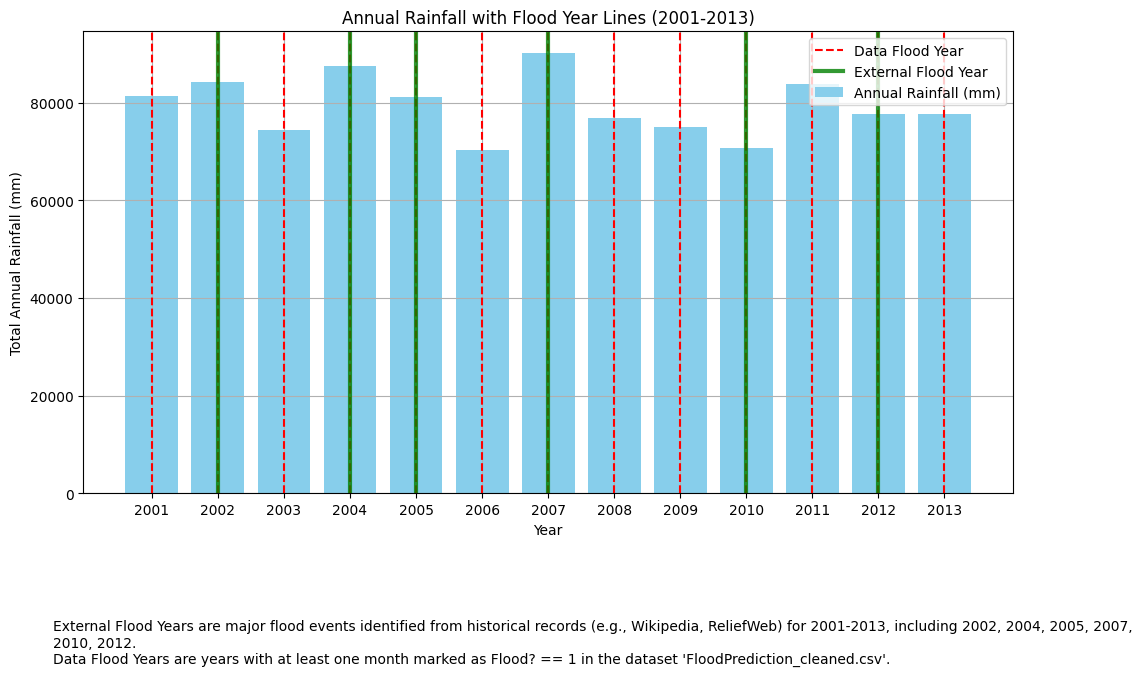

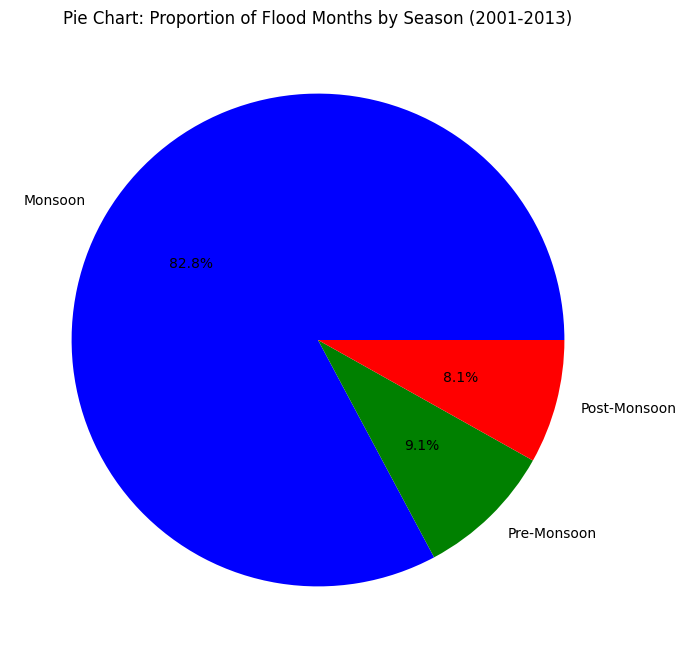

Top 10 High-Rainfall Years:
    Year      Rainfall
59  2007  90044.000000
43  1991  89574.000000
50  1998  89109.000000
56  2004  87448.000000
45  1993  86941.000000
35  1983  84948.000000
51  1999  84831.000000
42  1990  84497.608696
54  2002  84248.000000
63  2011  83828.000000

External Major Flood Years:
    External Major Flood Years
0                         1954
1                         1955
2                         1974
3                         1987
4                         1988
5                         1998
6                         2002
7                         2004
8                         2005
9                         2007
10                        2010
11                        2012


In [41]:
# Definitions
external_flood_years_info = "External Flood Years are major flood events identified from historical records (e.g., Wikipedia, ReliefWeb) for 2001-2013, including 2002, 2004, 2005, 2007, 2010, 2012."
data_flood_years_info = "Data Flood Years are years with at least one month marked as Flood? == 1 in the dataset 'FloodPrediction_cleaned.csv'."

# Load the cleaned dataset
df = pd.read_csv("FloodPrediction_cleaned.csv")

# Filter to verification dataset (2001-2013)
post_2001 = df[df['Year'] > 2000].copy()

# Ensure 'date' is datetime
post_2001['date'] = pd.to_datetime(post_2001['date'])

# Compute annual rainfall sum
annual_rainfall = post_2001.groupby('Year')['Rainfall'].sum().reset_index()

# Compute flood years from data (years with at least one Flood? == 1)
flood_years_data = post_2001[post_2001['Flood?'] == 1]['Year'].unique()
flood_years_data = sorted(flood_years_data)

# External major flood years (updated based on historical records)
external_flood_years = [2002, 2004, 2005, 2007, 2010, 2012]

# Verification Plot 1: Annual Rainfall with Flood Year Lines
fig1, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(annual_rainfall['Year'], annual_rainfall['Rainfall'], color='skyblue', label='Annual Rainfall (mm)')

# Add vertical lines for flood years from data (label only once)
if len(flood_years_data) > 0:
    ax1.axvline(x=flood_years_data[0], color='red', linestyle='--', label='Data Flood Year')
    for year in flood_years_data[1:]:
        ax1.axvline(x=year, color='red', linestyle='--')

# Add vertical lines for external flood years (more visible, label only once)
if len(external_flood_years) > 0:
    ax1.axvline(x=external_flood_years[0], color='green', linestyle='-', linewidth=3, alpha=0.8, label='External Flood Year')
    for year in external_flood_years[1:]:
        ax1.axvline(x=year, color='green', linestyle='-', linewidth=3, alpha=0.8)

ax1.set_title('Annual Rainfall with Flood Year Lines (2001-2013)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Annual Rainfall (mm)')
ax1.set_xticks(annual_rainfall['Year'])
ax1.legend()
ax1.grid(True)

# Add definitions as text in the plot
fig1.text(0.1, -0.1, external_flood_years_info + '\n' + data_flood_years_info, ha='left', va='top', fontsize=10, wrap=True)

plt.show()

# Verification Plot 2: Pie Chart: Proportion of Flood Months by Season (2001-2013)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Pre-Monsoon'
    elif month in [6, 7, 8, 9]:
        return 'Monsoon'
    else:
        return 'Post-Monsoon'

post_2001['Season'] = post_2001['Month'].apply(get_season)
flood_by_season = post_2001[post_2001['Flood?'] == 1]['Season'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(flood_by_season, labels=flood_by_season.index, autopct='%1.1f%%', colors=['blue', 'green', 'red', 'orange'])
plt.title('Pie Chart: Proportion of Flood Months by Season (2001-2013)')
plt.show()

# For the table: Top 10 high-rainfall years from full dataset
full_annual_rain = df.groupby('Year')['Rainfall'].sum().reset_index()
top_10_rainfall = full_annual_rain.sort_values('Rainfall', ascending=False).head(10)

# Print the table
print("Top 10 High-Rainfall Years:")
print(top_10_rainfall)

# External flood years for comparison (full period)
external_floods = pd.DataFrame({
    'External Major Flood Years': [1954, 1955, 1974, 1987, 1988, 1998, 2002, 2004, 2005, 2007, 2010, 2012]
})
print("\nExternal Major Flood Years:")
print(external_floods)